# Support Vector Machines and Decision Trees Project

### The Data
We will be using the dataset <em>tp5.csv</em>. 

This dataset contains 5000 cases and 13 features, including:

- city_name
- magnitude_of_delay
- delay_in_seconds
- affected_roads
- record_date
- luminosity
- avg_temperature
- avg_atm_pressure
- avg_humidity
- avg_wind_speed
- avg_precipitation
- avg_rain
- incidents

## Import Libraries

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the data

In [6]:
data = pd.read_csv('training_data.csv')
test = pd.read_csv('test_data.csv')

# Handling missing data and possible data transformations
- Remove missing values, outliers, and unnecessary rows/ columns
- Check and impute null values
- Check Imbalanced data
- Re-indexing and reformatting our data

In [7]:
data.columns

Index(['city_name', 'magnitude_of_delay', 'delay_in_seconds', 'affected_roads',
       'record_date', 'luminosity', 'avg_temperature', 'avg_atm_pressure',
       'avg_humidity', 'avg_wind_speed', 'avg_precipitation', 'avg_rain',
       'incidents'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


In [9]:
data.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


In [10]:
data.isnull().sum()

city_name              0
magnitude_of_delay     0
delay_in_seconds       0
affected_roads        85
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_precipitation      0
avg_rain               0
incidents              0
dtype: int64

<AxesSubplot: >

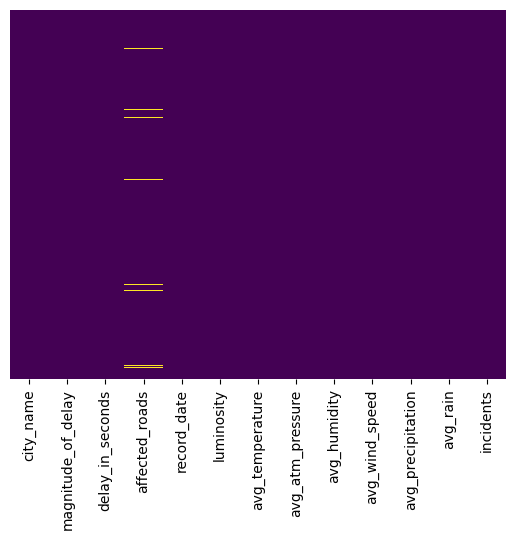

In [11]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
data['affected_roads'].head()

0                                                    ,
1                                                N101,
2                                                    ,
3    N101,R206,N105,N101,N101,N101,N101,N101,N101,N...
4                            N101,N101,N101,N101,N101,
Name: affected_roads, dtype: object

In [13]:
data[data['affected_roads'].isnull()]

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
29,Guimaraes,UNDEFINED,64,NaN,2021-01-22 09:00,LIGHT,8.0,1012.0,91.0,4.0,0.0,Sem Chuva,Medium
76,Guimaraes,UNDEFINED,223,NaN,2021-01-29 08:00,LIGHT,11.0,1022.0,92.0,1.0,0.0,Sem Chuva,High
79,Guimaraes,MAJOR,80,NaN,2021-12-24 21:00,DARK,11.0,1004.0,92.0,0.0,0.0,Sem Chuva,None
91,Guimaraes,UNDEFINED,52,NaN,2021-03-02 13:00,LIGHT,13.0,1024.0,78.0,2.0,0.0,Sem Chuva,Low
109,Guimaraes,UNDEFINED,139,NaN,2021-12-27 13:00,LIGHT,15.0,1014.0,88.0,5.0,0.0,Sem Chuva,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4785,Guimaraes,MAJOR,298,NaN,2021-12-22 13:00,LIGHT,16.0,1015.0,71.0,3.0,0.0,Sem Chuva,None
4811,Guimaraes,UNDEFINED,96,NaN,2021-03-11 15:00,LIGHT,13.0,1025.0,89.0,3.0,0.0,chuva fraca,Medium
4838,Guimaraes,UNDEFINED,36,NaN,2021-03-10 13:00,LIGHT,14.0,1025.0,65.0,2.0,0.0,Sem Chuva,Low
4854,Guimaraes,UNDEFINED,233,NaN,2021-01-29 20:00,DARK,11.0,1017.0,92.0,1.0,0.0,Sem Chuva,High


In [14]:
data.drop(['avg_precipitation'],axis=1,inplace=True)
test.drop(['avg_precipitation'],axis=1,inplace=True)

data.drop(['city_name'],axis=1,inplace=True)
test.drop(['city_name'],axis=1,inplace=True)


data.head()

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None
1,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None
2,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low
3,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High
4,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High


<AxesSubplot: >

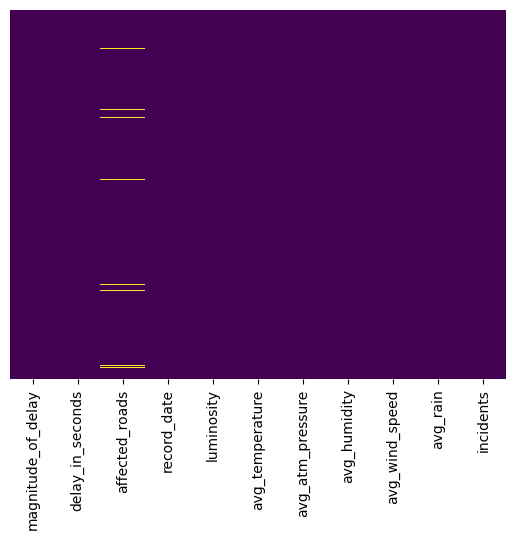

In [15]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
data.isnull().sum()

magnitude_of_delay     0
delay_in_seconds       0
affected_roads        85
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_rain               0
incidents              0
dtype: int64

In [17]:
data.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   magnitude_of_delay  5000 non-null   object 
 1   delay_in_seconds    5000 non-null   int64  
 2   affected_roads      4915 non-null   object 
 3   record_date         5000 non-null   object 
 4   luminosity          5000 non-null   object 
 5   avg_temperature     5000 non-null   float64
 6   avg_atm_pressure    5000 non-null   float64
 7   avg_humidity        5000 non-null   float64
 8   avg_wind_speed      5000 non-null   float64
 9   avg_rain            5000 non-null   object 
 10  incidents           5000 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 429.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              -----------

In [18]:
print(data['magnitude_of_delay'].value_counts())

UNDEFINED    4314
MAJOR         678
MODERATE        8
Name: magnitude_of_delay, dtype: int64


# Magnitude ja é representada pelo delay em segundos

In [19]:
data.drop('magnitude_of_delay',axis=1, inplace=True)
test.drop('magnitude_of_delay',axis=1, inplace=True)
data.head()

,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None
1,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None
2,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low
3,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High
4,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High


/tmp/ipykernel_10418/3880302074.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


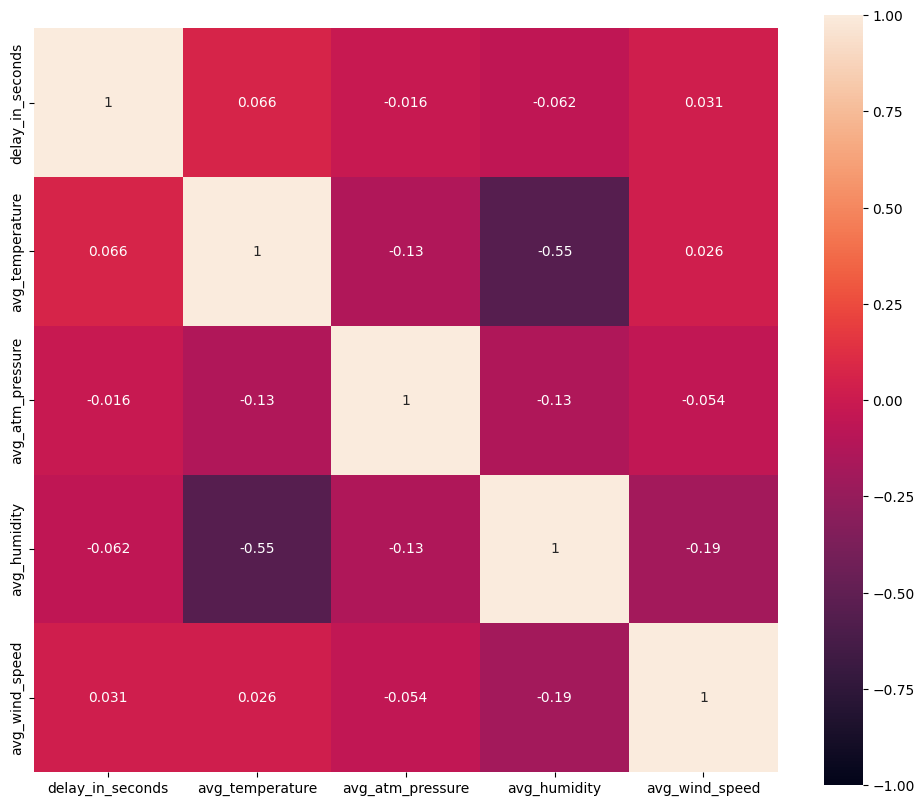

In [20]:
corr_matrix = data.corr()
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True);

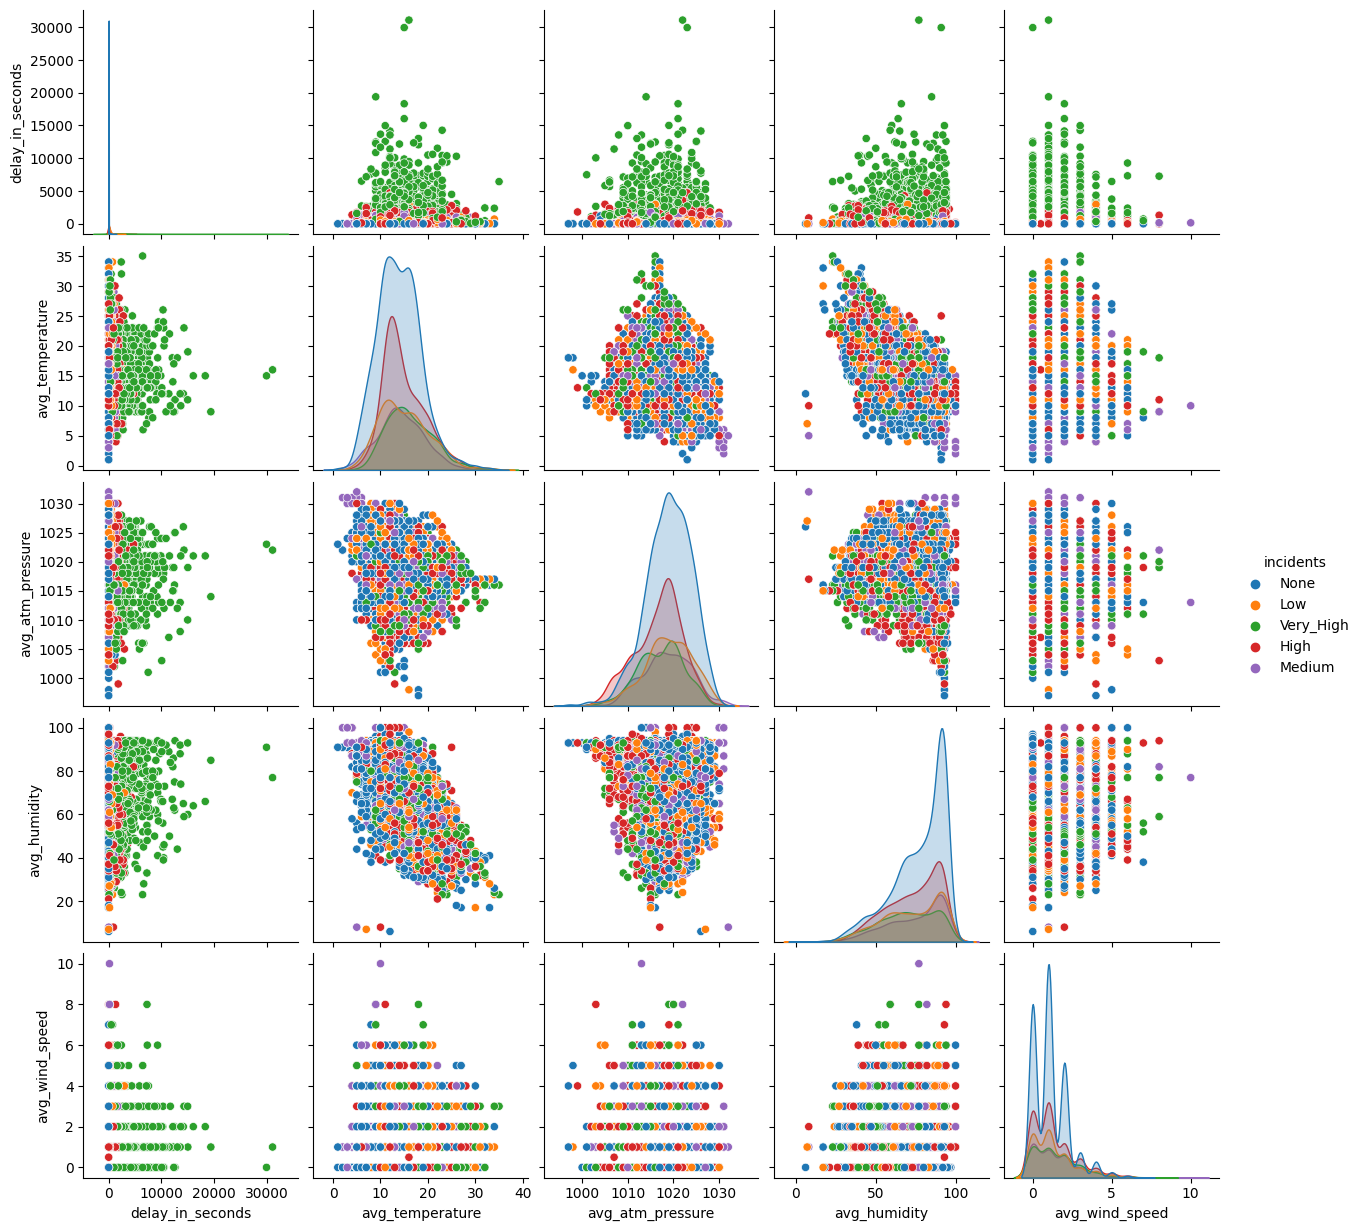

In [21]:
sns.pairplot(data, hue='incidents') 

In [22]:
print(data['incidents'].value_counts())

None         2028
High         1073
Low           718
Very_High     603
Medium        578
Name: incidents, dtype: int64


In [23]:
print(data['incidents'].value_counts().count())

5


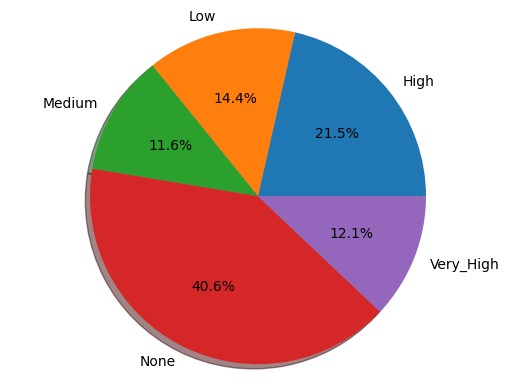

In [24]:
labels = data['incidents'].astype('category').cat.categories.tolist()
counts = data['incidents'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1,ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',shadow=True)
ax1.axis('equal')
plt.show()

In [25]:
incidents_count = data['incidents'].value_counts()
sns.set(style='darkgrid')
sns.barplot(incidents_count.index, incidents_count.values, alpha=0.9)
plt.title('Frequency Distribution of Incidents')
plt.ylabel('Number of Occurences',fontsize=12)
plt.xlabel('Incidents',fontsize=12)
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [ ]:
data_r1=data.copy()
data_r1.head()

In [ ]:
replace_map = {'incidents' : {'None':0,'Low':1,'Medium':2,'High':3, 'Very_High':4}}

In [ ]:
#data_r1.replace(replace_map,inplace=True)
data_r1.head()


In [ ]:
data.replace(replace_map,inplace=True)
test.replace(replace_map,inplace=True)
data.head()

In [ ]:
data['luminosity'].value_counts()

In [ ]:
replace_lum = {'luminosity' : {'DARK':0,'LOW_LIGHT':1,'LIGHT':2}}
data.replace(replace_lum,inplace=True)
test.replace(replace_lum,inplace=True)
data.head()

In [ ]:
data['avg_rain'].value_counts()

In [ ]:
replace_rain = {'avg_rain' : {'Sem Chuva':0,'chuva fraca':1,'chuva moderada':2, 'chuva forte': 3}}
data.replace(replace_rain,inplace=True)
test.replace(replace_rain,inplace=True)
data.head()

# Agora com mais dados para matriz de correlacao e pairplot

In [ ]:
corr_matrix = data.corr()
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True);

In [ ]:
sns.pairplot(data, hue='incidents',palette=sns.color_palette("hls", 5)) 

In [ ]:
data.head()

# Tratar as affected_roads com nº de vezes, moda e valores diferentes 

In [ ]:
data_r1 = data.copy()

In [ ]:
data_r1["affected_roads"].describe()

# Tentar substituir os NaN pelo valor mais usual (N101,N101,N101,N101,N101)

In [ ]:
import math
def affected_road(lista):
    n_relatos = 0
    n_relatos_dif = 0
    maior_relatos_iguais = 0
    dic = {}
    if isinstance(lista, float):
        return pd.Series({"N_relatos": 5, "N_relatos_dif": 1, "Mais relatos na mesma rua":5})
    else:
        l = lista.split(",")
        for rua in l:
            if len(rua) != 0:            
                if rua in dic.keys():
                    dic[rua] += 1
                else:
                    dic[rua] = 1
                    n_relatos_dif += 1
                n_relatos += 1
        
        for rua in dic.keys():
            if dic[rua] > maior_relatos_iguais:
                maior_relatos_iguais = dic[rua]
    
    return pd.Series({"N_relatos": n_relatos, "N_relatos_dif": n_relatos_dif, "Mais relatos na mesma rua":maior_relatos_iguais})

    

data_r1[["N_relatos","N_relatos_dif","Mais relatos na mesma rua"]] = data_r1['affected_roads'].apply(affected_road)
data_r1.drop('affected_roads',axis=1, inplace=True)
data_r1.head()

In [ ]:
corr_matrix = data.corr()
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True);

In [ ]:
sns.pairplot(data_r1, hue='incidents',palette=sns.color_palette("hls", 5)) 

In [ ]:
data.head()

In [ ]:
data[["N_relatos","N_relatos_dif","Mais relatos na mesma rua"]] = data['affected_roads'].apply(affected_road)
data.drop('affected_roads',axis=1, inplace=True)

test[["N_relatos","N_relatos_dif","Mais relatos na mesma rua"]] = test['affected_roads'].apply(affected_road)
test.drop('affected_roads',axis=1, inplace=True)
data.head()

In [ ]:
data_dt['record_date'].head()

In [ ]:
data_dt['record_date_month'] = data_dt['record_date'].dt.month
data_dt['record date day'] = data_dt['record_date'].dt.day
data_dt['record_date_hour'] = data_dt['record_date'].dt.hour

In [ ]:
data_dt.head()

In [ ]:
data_dt.drop('record_date_year' ,axis=1,inplace=True)
data_dt.drop('record_date_minute' ,axis=1, inplace=True)
data_dt.drop('record_date',axis=1,inplace=True)

In [ ]:
data.head()

In [ ]:
data['record_date'] = pd.to_datetime(data['record_date'], format = '%Y-%m-%d %H:%M', errors='coerce')
data['record_date_month'] = data['record_date'].dt.month
data['record date day'] = data['record_date'].dt.day
data['record_date_hour'] = data['record_date'].dt.hour

data.drop('record_date',axis=1,inplace=True)


test['record_date'] = pd.to_datetime(test['record_date'], format = '%Y-%m-%d %H:%M', errors='coerce')
test['record_date_month'] = test['record_date'].dt.month
test['record date day'] = test['record_date'].dt.day
test['record_date_hour'] = test['record_date'].dt.hour

test.drop('record_date',axis=1,inplace=True)

In [ ]:
data.head()

In [ ]:
test.head()

In [ ]:
sns.distplot(data["delay_in_seconds"])
data[data["delay_in_seconds"] > 1000]

In [ ]:
sns.scatterplot(data=data,y="N_relatos",x="delay_in_seconds",hue="incidents")

# Coluna muito relacionada com n_relatos

In [ ]:
data.drop("Mais relatos na mesma rua",axis=1, inplace=True)
test.drop("Mais relatos na mesma rua",axis=1, inplace=True)

data.head()

# Exploratory Data Analysis

Time to put your data viz skills to the test! Try to recreate the following plots, make sure to import the libraries you'll need!

# Train Test Split

** Split your data into a training set and a testing set.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = data['incidents']    
x = data.loc[:, data.columns != "incidents"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2022)


# Train a Model

Now its time to train a Support Vector Machine Classifier. 

**Call the SVC() model from sklearn and fit the model to the training data.**

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 10, random_state=2021)
clf.fit(x,y)

1. Plot the resultant tree (plot_tree) and save it as figure (.png)

In [ ]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf)
plt.show()

fig.savefig("dt_plot.png")

2. Use export_text to represent the tree. Save it in a log file

## Model Evaluation - SVM and DT

**Now get predictions from the model and create a confusion matrix and a classification report.**

In [ ]:
predictions_clf = clf.predict(x)


In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix

Support Vector Machine

In [ ]:
plot_confusion_matrix(clf,x,y)

In [ ]:
print(classification_report(y,predictions_clf))

Decision Tree Classifier

Wow! You should have noticed that your model was pretty good! Let's see if we can tune the parameters to try to get even better (unlikely, and you probably would be satisfied with these results in real like because the data set is quite small, but I just want you to practice using GridSearch.

## Gridsearch Practice

In [ ]:
from sklearn.model_selection import GridSearchCV

**Create a dictionary called param_grid and fill out some parameters for C and gamma.**

Decision Tree Classifier

In [ ]:
ccp_alphas = clf.cost_complexity_pruning_path(x_train, y_train)["ccp_alphas"]

param_grid_clf = {'criterion': ["gini","entropy","log_loss"], 'max_depth': [8,10,20]}




In [ ]:
grid_clf = GridSearchCV(clf,param_grid_clf,refit=True,verbose=3)
grid_clf.fit(x,y)

Support Vector Machine

In [ ]:
grid_clf.best_params_

In [ ]:
grid_predictions2 = grid_clf.predict(test)
grid_predictions2

In [ ]:
grid_predictions2

df = pd.DataFrame({"incidents":grid_predictions2})

def update(x):
    if x == 0:
        return "None"
    elif x == 1:
        return "Low"
    elif x == 2:
        return "Medium"
    elif x == 3:
        return "High"
    else:
        return "Very High"

df['incidents'] = df['incidents'].apply(update)
df.index = np.arange(1, len(df) + 1)

df.to_csv('test.csv',index_label="RowId")

## Prunig
https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107)

Decision Tree Classifier

In [ ]:
...

#### Best Depth Tree

Max_depth

In [ ]:
...

Model with DecisionTreeClassifier using GridSearchCV. Max_depth as param_grid

In [ ]:
...

Best_params_

In [ ]:
...

Best_estimator

In [ ]:
...

Best_max_depth

In [ ]:
...

Evaluate the model with confusion matrix  and classification report

In [ ]:
...

In [ ]:
...

#### Pruned Tree

Define the ccp_alphas

In [ ]:
...

In [ ]:
...

Get the keys of parameters for estimator

In [ ]:
...

Model with DecisionTreeClassifier using GridSearchCV. Ccp_alpha as param_grid

In [ ]:
...

Best_params_

In [ ]:
...

Best_estimator_

In [ ]:
...

Evaluate the model with confusion matrix  and classification report

In [ ]:
...

In [ ]:
...